<a href="https://colab.research.google.com/github/arvind-prabhu259/Projects/blob/main/Copy_of_SAE_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary modules and packages
import numpy as np
import matplotlib.pyplot as plt
import keras
import cv2
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import random
import pandas as pd

In [ ]:
np.random.seed(0)

In [ ]:
#Cloning the dataset
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), 117.80 MiB | 7.23 MiB/s, done.


In [ ]:
# sign names
df = pd.read_csv('german-traffic-signs/signnames.csv')
df.head(43)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [ ]:
#Loading data in pickle format to matrix format
with open('german-traffic-signs/train.p','rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
    val_data = pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
    test_data = pickle.load(f)

# for i in train_data['features'][0]:
#     print(i)
# print(train_data['features'][1])
# print(len(train_data['features'][0]))

[[[28 24 24]
  [26 23 23]
  [27 24 24]
  ...
  [31 28 26]
  [31 28 27]
  [32 28 27]]

 [[27 24 24]
  [27 24 24]
  [28 25 24]
  ...
  [31 27 25]
  [31 27 26]
  [33 29 27]]

 [[26 24 24]
  [26 24 24]
  [27 24 23]
  ...
  [31 26 25]
  [31 27 26]
  [33 29 27]]

 ...

 [[28 25 23]
  [30 27 24]
  [30 27 24]
  ...
  [27 24 22]
  [27 24 22]
  [28 24 22]]

 [[27 24 22]
  [29 26 23]
  [31 26 24]
  ...
  [26 23 21]
  [27 24 22]
  [28 25 23]]

 [[28 24 23]
  [28 24 22]
  [29 24 22]
  ...
  [27 23 22]
  [27 24 23]
  [29 26 25]]]


In [ ]:
#assigning features of training data to train x and labels of training data to train y
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [ ]:
#Checking the shapes of dataset
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

#we get: (number of images,length of image,width of image,no of channels i.e R,G,B)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
#to check the dimensions and shapes of the loaded training, validation, and test datasets
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (32, 32, 3)), "The dimensions of the image is not 32*32*3"
assert(X_val.shape[1:] == (32, 32, 3)), "The dimensions of the image is not 32*32*3"
assert(X_test.shape[1:] == (32, 32, 3)), "The dimensions of the image is not 32*32*3"

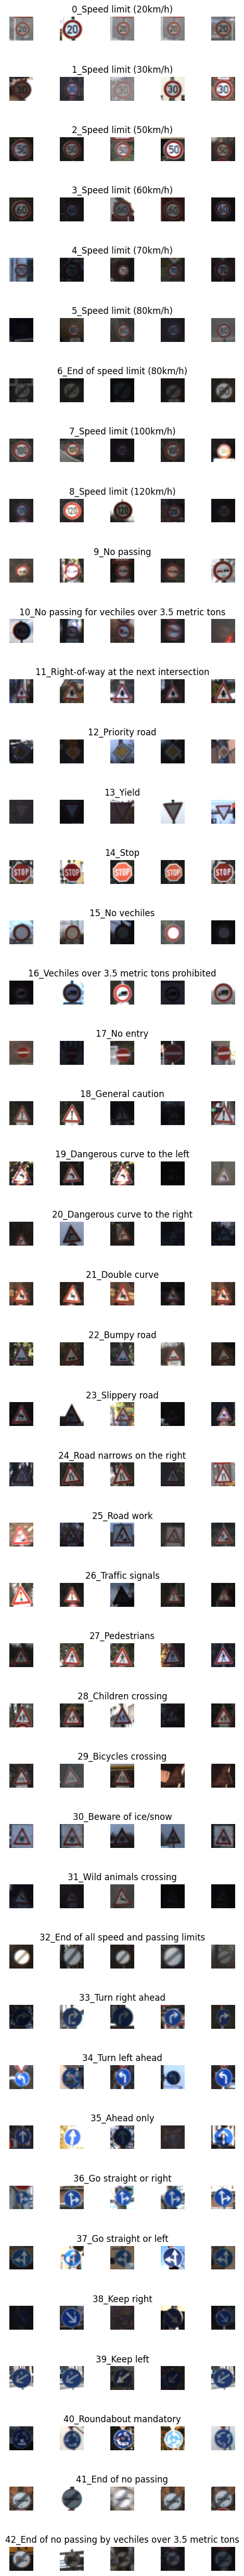

In [ ]:
#data visualisation

data = pd.read_csv('german-traffic-signs/signnames.csv')

num_of_samples = []

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected)-1)), :, :], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "_" + row["SignName"])
            num_of_samples.append(len(x_selected))



[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

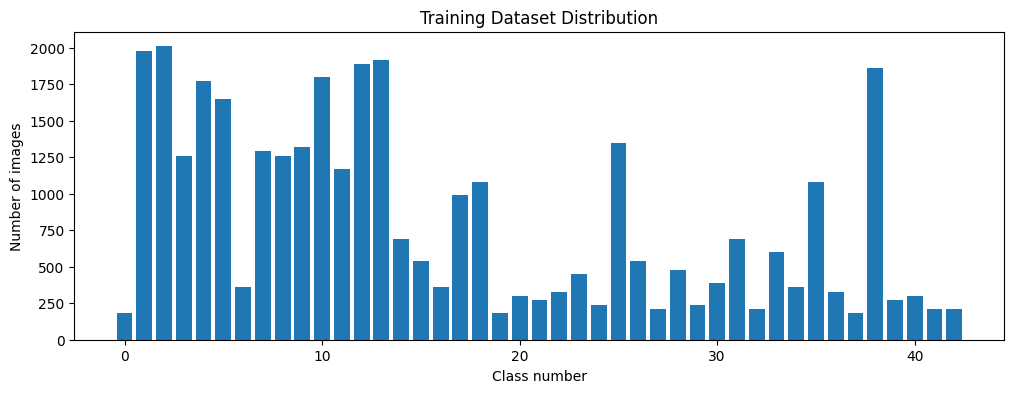

In [ ]:
#getting no of samples in each class in training dataset and plotting training dataset dstribution
print(num_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Training Dataset Distribution")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
41


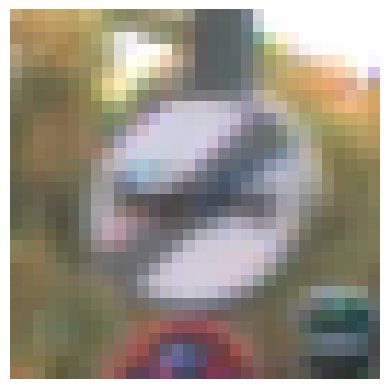

In [ ]:
#data preprocessing
plt.imshow(X_train[100])
plt.axis('off')
print(X_train[100].shape)
print(y_train[100])

In [ ]:
#converting RGB to Gray scale
def grayscale(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.axis('off')
    return image

(32, 32)


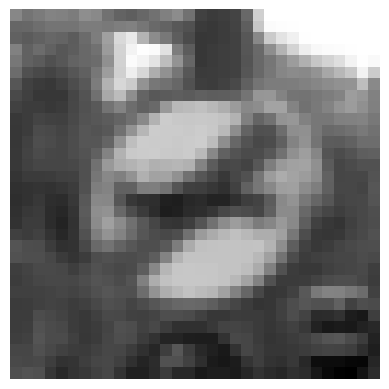

In [ ]:
img = grayscale(X_train[100])
plt.imshow(img, cmap = 'gray')
print(img.shape)

In [ ]:
#using histogram equalisation technique to standardize contrast or light in all images
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

(32, 32)


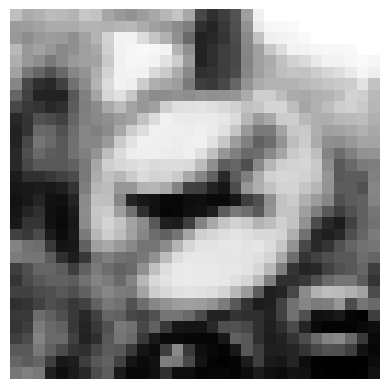

In [ ]:
img = equalize(img)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
print(img.shape)

In [ ]:
#Normalizing images
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

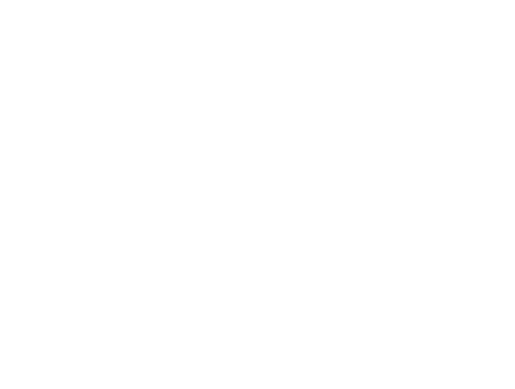

In [ ]:
#applying preprocessing to each features
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

In [ ]:
#reshaping data to 3d
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [ ]:
#generating some datasets with diffrent angles using keras image data generator
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range = 0.1,
                  height_shift_range = 0.1,
                   zoom_range = 0.2,
                  shear_range = 0.1,
                  rotation_range = 10)

datagen.fit(X_train)

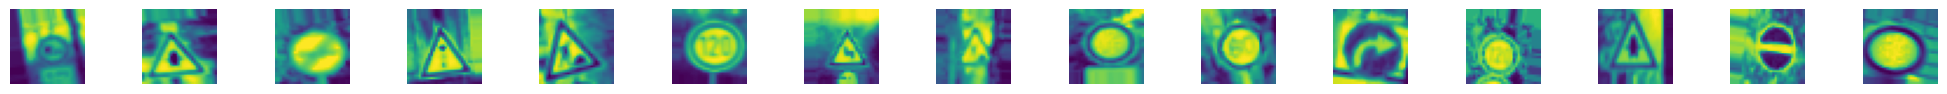

In [ ]:
batches = datagen.flow(X_train, y_train, batch_size = 20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize = (20, 5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32, 32))
  axs[i].axis('off')

In [ ]:
#one-hot encode the labels
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
#Defining the model
def neural_model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape = (32, 32, 1), activation = 'relu'))
    model.add(Conv2D(60, (5, 5), input_shape = (32, 32, 1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Conv2D(30, (3, 3), activation = 'relu'))
    model.add(Conv2D(30, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    #model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(500, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
#Summary of the model
model = neural_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#Training the model
history = model.fit_generator(datagen.flow(X_train, y_train,batch_size=64),
                             steps_per_epoch=150,
                             epochs=15,
                             validation_data=(X_val,y_val),shuffle=1)

Epoch 1/15


<ipython-input-38-42f10f3151f5>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train,batch_size=64),


150/150 [==============================] - 133s 874ms/step - loss: 3.1212 - accuracy: 0.1683 - val_loss: 1.7379 - val_accuracy: 0.4798
Epoch 2/15
150/150 [==============================] - 132s 882ms/step - loss: 1.7328 - accuracy: 0.4863 - val_loss: 0.8881 - val_accuracy: 0.7433
Epoch 3/15
150/150 [==============================] - 124s 827ms/step - loss: 1.1809 - accuracy: 0.6394 - val_loss: 0.4851 - val_accuracy: 0.8440
Epoch 4/15
150/150 [==============================] - 124s 829ms/step - loss: 0.8627 - accuracy: 0.7417 - val_loss: 0.2854 - val_accuracy: 0.9129
Epoch 5/15
150/150 [==============================] - 128s 857ms/step - loss: 0.6835 - accuracy: 0.7883 - val_loss: 0.2682 - val_accuracy: 0.9048
Epoch 6/15
150/150 [==============================] - 130s 865ms/step - loss: 0.5646 - accuracy: 0.8267 - val_loss: 0.1812 - val_accuracy: 0.9474
Epoch 7/15
150/150 [==============================] - 129s 856ms/step - loss: 0.4758 - accuracy: 0.8532 - val_loss: 0.1524 - val_accura

Text(0.5, 0, 'epoch')

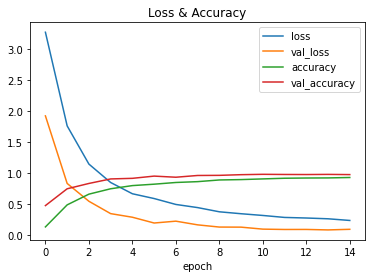

In [ ]:
#plotting loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.title('Loss & Accuracy')
plt.xlabel('epoch')

In [ ]:
#Evaluate the model with test data
score = model.evaluate(X_test, y_test, verbose = 1)
print('Test Score', score[0])
print('Test Accuracy', score[1])

395/395 [==============================] - 35s 88ms/step - loss: 0.1834 - accuracy: 0.9519
Test Score 0.1834266036748886
Test Accuracy 0.9518606662750244


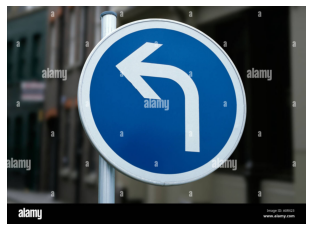

In [ ]:
# Testing the model
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
image = Image.open(r.raw)
plt.axis('off')
plt.imshow(image, cmap=plt.get_cmap('gray'))

(32, 32)


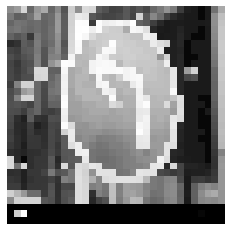

In [ ]:
img = np.asarray(image)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)

In [ ]:
df.columns

Index(['ClassId', 'SignName'], dtype='object')

1/1 [==============================] - 0s 124ms/step
Predicted class is  34
The traffic sign is  Turn left ahead


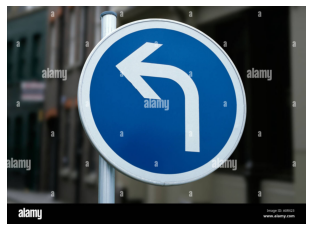

In [ ]:
img = img.reshape(1,32,32,1)
label = np.argmax(model.predict(img))
plt.imshow(image)
plt.axis('off')
print('Predicted class is ',str(label))
print('The traffic sign is ',df['SignName'][int(label)])